<a href="https://colab.research.google.com/github/aidlisalma/gomycode/blob/main/Random_Forest_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
df=pd.read_csv("titanic-passengers.csv",sep=';')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Dropping the Cabin column because 77% of its values are Nan
df.drop("Cabin",axis=1,inplace=True)
#replacing the Nan values in age with the mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
#printing the most common value in Embarked
print(df['Embarked'].value_counts())
#replacing the Nan values by the most common one
df['Embarked'].fillna('S',inplace=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
#converting categorical data into numerical
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
embarked_transfom={
    "Embarked": {"C":0,"Q":1,"S":2}
}
df.replace(embarked_transfom,inplace=True)
survived_transf={
    "Survived": {"No":0,"Yes":1}
}
df.replace(survived_transf,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2


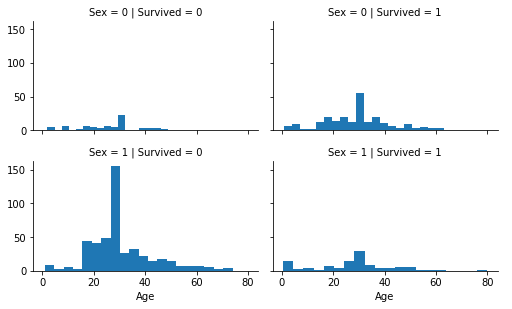

In [ ]:
g=sns.FacetGrid(df,row='Sex',col='Survived',height=2.2,aspect=1.6)
g.map(plt.hist,'Age',bins=20)
g.add_legend()

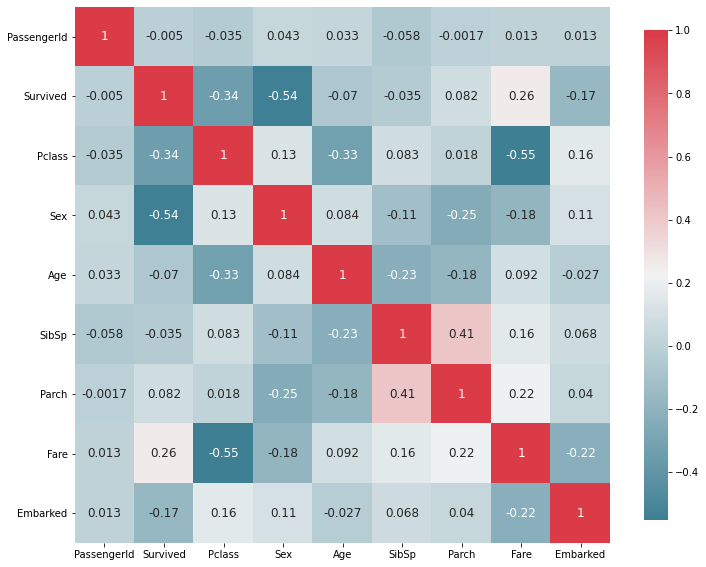

In [ ]:
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )
#This function is a manual execution of the correlation groupby operation showing the impact of each feature on one another.

In [ ]:
df[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
#creating a title dict
Title_Dictionary = {
                    "Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty",
                    "Don":"Royalty",
                    "Sir" :"Royalty",
                    "Lady" :"Royalty",
                    "the Countess":"Royalty",
                    "Dona":"Royalty",
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss" :"Miss",
                    "Ms":"Mrs",
                    "Mr" :"Mrs",
                    "Mrs" :"Mrs",
                    "Master" :"Master"
                    }

In [ ]:
#Extracting the titles from the name column
df["Title"]=df.Name.str.extract('([A-Za-z]+)\.',expand=False)
#Replacing with titles in the name column
df["Title"].replace(Title_Dictionary,inplace=True)

In [ ]:
#Dropping the Name column since we replaced it with Title
df.drop("Name",axis=1,inplace=True)

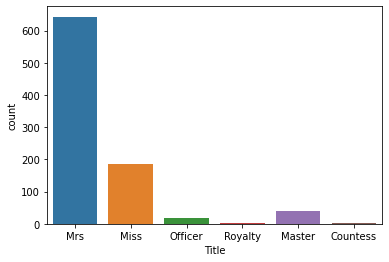

In [ ]:
sns.countplot(x="Title",data=df)

In [ ]:
#Creating a new feature FamilySize using Parch and SibSp
df['FamilySize']=df['Parch']+df['SibSp']

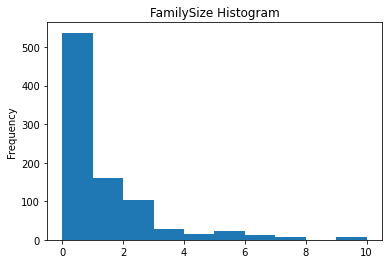

In [ ]:
#Familysize histogram
plt.title("FamilySize Histogram")
#plt.xlabel("Family Size")
df['FamilySize'].plot.hist()

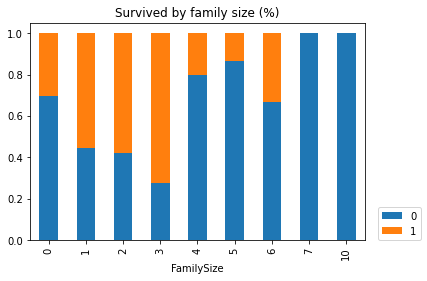

In [ ]:
#correlation between familysize and survival
pd.crosstab(df['FamilySize'], df['Survived'], normalize='index').plot.bar(stacked=True, title="Survived by family size (%)").legend(loc=(1.04,0))

In [ ]:
X = df[['Age', 'Sex','FamilySize','Fare','Embarked']]
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)
clf = DecisionTreeClassifier()  
treef=clf.fit(X_train, y_train)  
y_pred=clf.predict(X_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8116591928251121


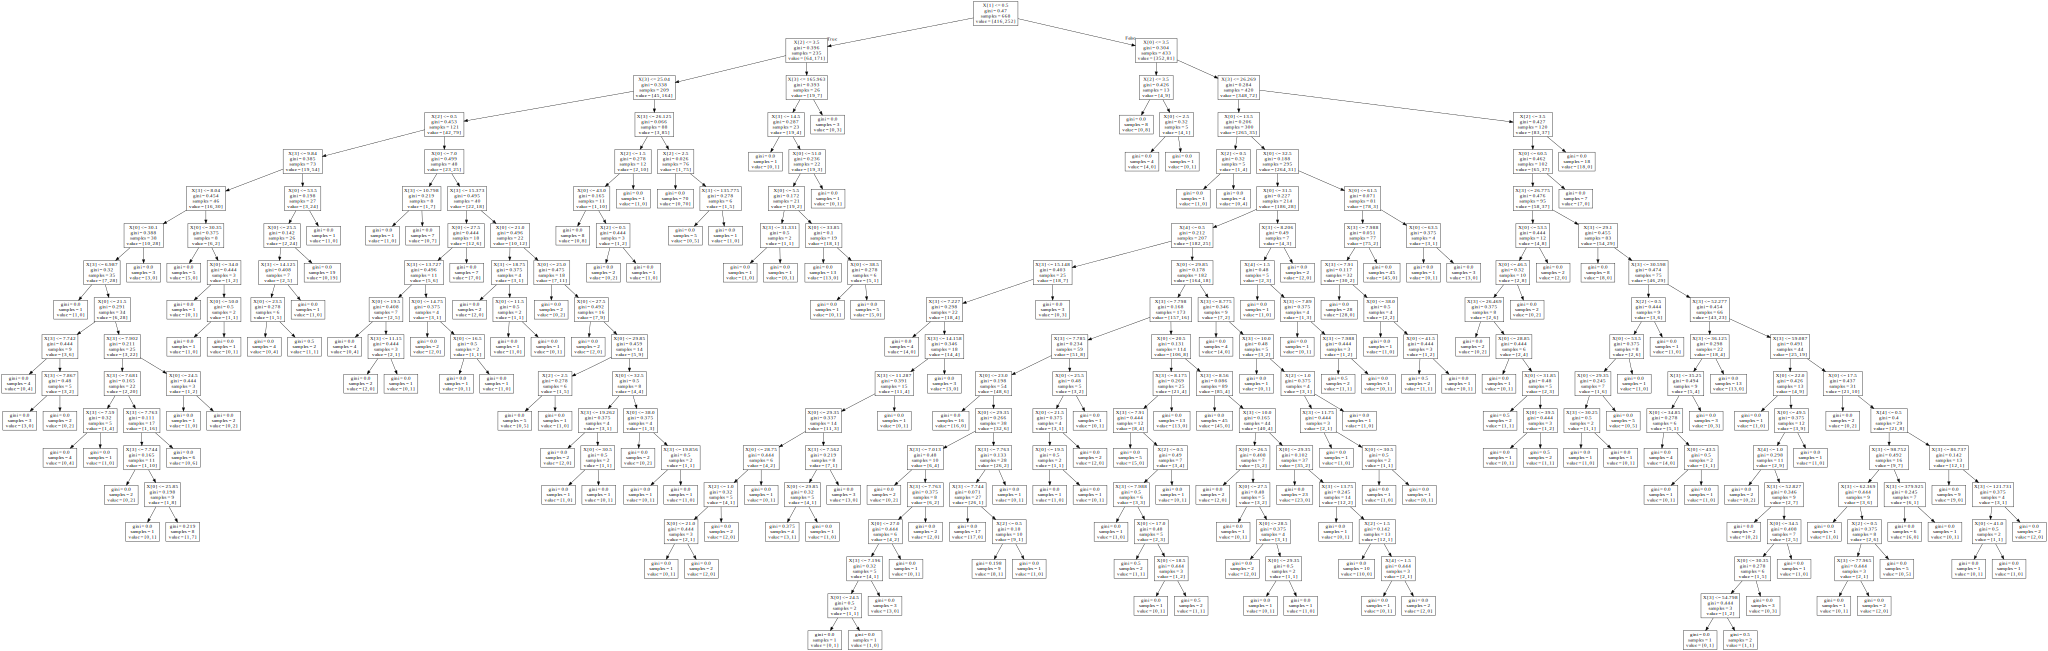

In [ ]:
dot_data= tree.export_graphviz(treef,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

In [ ]:
X = df[['Sex','Age','FamilySize','Embarked','Fare']]
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)
clf = DecisionTreeClassifier(criterion="gini",splitter='random',max_leaf_nodes=15,min_samples_leaf=7,max_depth=6)  
tree2=clf.fit(X_train, y_train)  
y_pred=clf.predict(X_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8295964125560538


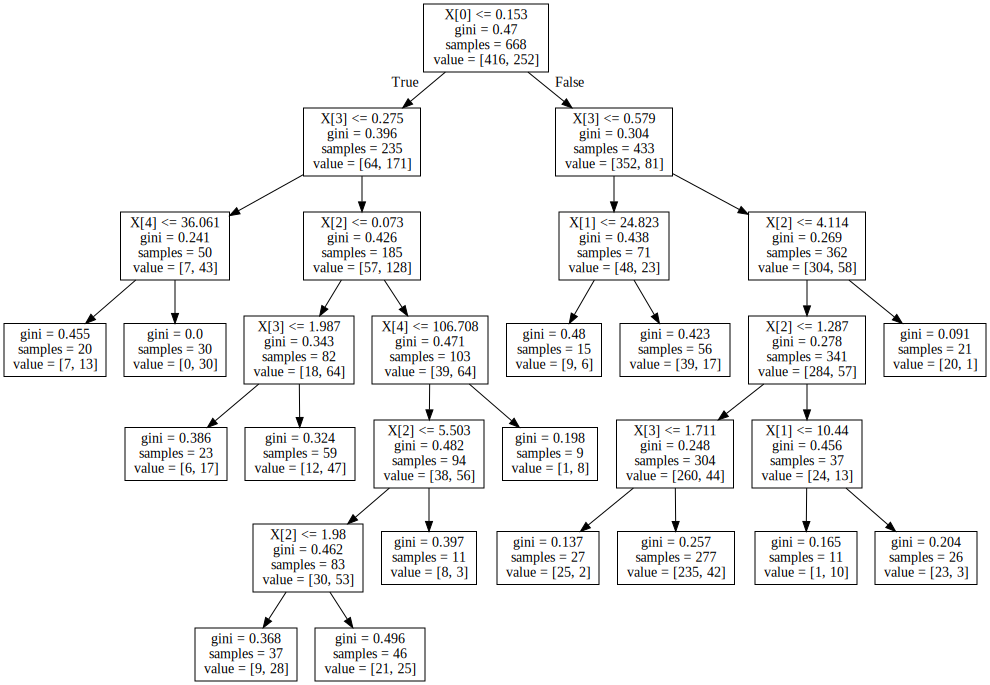

In [ ]:
dot_data= tree.export_graphviz(tree2,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

In [ ]:
X = df[['Age', 'Sex','FamilySize','Embarked','Fare']]
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)
clf=RandomForestClassifier(n_estimators=15) 
tree3=clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8116591928251121


In [ ]:
X = df[['Age', 'Sex','FamilySize','Embarked','Fare']]
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)
clf=RandomForestClassifier(n_estimators=20) 
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8340807174887892
